In [12]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
!pip install python_speech_features
!pip install playsound
import python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=883abac5f2f67160ea1506cfaef5dd4ec058b3405125517dd386847b02e0272c
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


## Download dataset
By default the script will download the [Speech Commands dataset](https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz)

In [2]:
!wget -P dataset https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz 
%cd dataset
!sudo tar -xvf speech_commands_v0.02.tar.gz
%cd ..

--2020-11-29 16:11:34--  https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘dataset/speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G  60.7MB/s    in 19s     

2020-11-29 16:11:53 (124 MB/s) - ‘dataset/speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [34]:
# Dataset path and view possible targets
dataset_path = 'dataset'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

one
bed
off
three
learn
nine
down
up
wow
left
on
backward
two
bird
tree
follow
house
_background_noise_
visual
five
eight
seven
marvin
stop
forward
happy
six
four
sheila
dog
yes
zero
no
go
right
cat


In [35]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['one', 'bed', 'off', 'three', 'learn', 'nine', 'down', 'up', 'wow', 'left', 'on', 'backward', 'two', 'bird', 'tree', 'follow', 'house', '_background_noise_', 'visual', 'five', 'eight', 'seven', 'marvin', 'stop', 'forward', 'happy', 'six', 'four', 'sheila', 'dog', 'yes', 'zero', 'no', 'go', 'right', 'cat']


In [36]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['one', 'bed', 'off', 'three', 'learn', 'nine', 'down', 'up', 'wow', 'left', 'on', 'backward', 'two', 'bird', 'tree', 'follow', 'house', 'visual', 'five', 'eight', 'seven', 'marvin', 'stop', 'forward', 'happy', 'six', 'four', 'sheila', 'dog', 'yes', 'zero', 'no', 'go', 'right', 'cat']


In [37]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

3890
2014
3745
3727
1575
3934
3917
3723
2123
3801
3845
1664
3880
2064
1759
1579
2113
1592
4052
3787
3998
2100
3872
1557
2054
3860
3728
2022
2128
4044
4052
3941
3880
3778
2031
Total samples: 105829


In [38]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [39]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

dataset/one
dataset/bed
dataset/off
dataset/three
dataset/learn
dataset/nine
dataset/down
dataset/up
dataset/wow
dataset/left
dataset/on
dataset/backward
dataset/two
dataset/bird
dataset/tree
dataset/follow
dataset/house
dataset/visual
dataset/five
dataset/eight
dataset/seven
dataset/marvin
dataset/stop
dataset/forward
dataset/happy
dataset/six
dataset/four
dataset/sheila
dataset/dog
dataset/yes
dataset/zero
dataset/no
dataset/go
dataset/right
dataset/cat


In [40]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [41]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [42]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [43]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

105829
10582


In [44]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [45]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [47]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [49]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [50]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
        

Dropped: 4 (16, 11)
Dropped: 82 (16, 9)
Dropped: 109 (16, 12)
Dropped: 111 (16, 14)
Dropped: 116 (16, 10)
Dropped: 136 (16, 12)
Dropped: 142 (16, 15)
Dropped: 160 (16, 11)
Dropped: 164 (16, 13)
Dropped: 168 (16, 10)
Dropped: 177 (16, 12)
Dropped: 181 (16, 13)
Dropped: 185 (16, 10)
Dropped: 230 (16, 13)
Dropped: 234 (16, 12)
Dropped: 258 (16, 13)
Dropped: 277 (16, 14)
Dropped: 287 (16, 14)
Dropped: 293 (16, 12)
Dropped: 295 (16, 7)
Dropped: 310 (16, 11)
Dropped: 319 (16, 10)
Dropped: 322 (16, 11)
Dropped: 328 (16, 15)
Dropped: 342 (16, 13)
Dropped: 345 (16, 14)
Dropped: 347 (16, 15)
Dropped: 369 (16, 12)
Dropped: 377 (16, 13)
Dropped: 413 (16, 7)
Dropped: 421 (16, 10)
Dropped: 422 (16, 7)
Dropped: 434 (16, 14)
Dropped: 439 (16, 15)
Dropped: 486 (16, 14)


In [51]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.07


MFCCs: [[-7.61898996e+01 -8.04378301e+01 -8.24536712e+01 -8.36236678e+01
  -8.48143566e+01 -8.37793811e+01 -5.88406920e+01 -3.58300046e+01
  -2.01690093e+01 -1.62413321e+01 -1.86872740e+01 -2.41119702e+01
  -3.21469713e+01 -4.29840306e+01 -5.43826301e+01 -6.40481520e+01]
 [ 2.68938198e+00  3.04373524e+00  3.83744061e+00  4.72954473e+00
   5.62096190e+00  5.19268505e+00 -1.33424603e+01 -7.70466667e+00
   1.53008438e+00  6.43924227e+00  1.05891997e+01  1.28669581e+01
   1.51598938e+01  1.80218116e+01  2.17131939e+01  2.07805408e+01]
 [-1.11417347e-01  1.40498554e+00  1.23689928e+00  1.48394818e+00
   2.65152348e+00  4.81300324e+00  8.00063208e+00  5.87197661e+00
   3.79354854e+00  2.93591755e+00  3.40689673e+00  5.49387497e+00
   6.83543706e+00  7.34395718e+00  6.28134427e+00  6.31572587e+00]
 [ 1.75264579e-02  3.82513963e-02  2.73021731e-01  5.26696674e-01
   1.70707666e+00  1.74959645e+00  3.01827925e+00  2.71643942e+00
   2.21636751e-02 -2.12675786e+00 -5.14260665e+00 -7.59198769e+00


ValueError: ignored

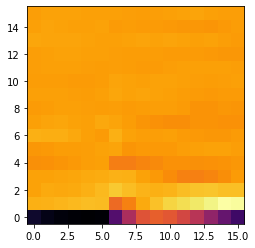

In [54]:
# TEST: Test shorter MFCC
from playsound import playsound

idx = 13

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [55]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [ ]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 4 (16, 11)
Dropped: 82 (16, 9)
Dropped: 109 (16, 12)
Dropped: 111 (16, 14)
Dropped: 116 (16, 10)
Dropped: 136 (16, 12)
Dropped: 142 (16, 15)
Dropped: 160 (16, 11)
Dropped: 164 (16, 13)
Dropped: 168 (16, 10)
Dropped: 177 (16, 12)
Dropped: 181 (16, 13)
Dropped: 185 (16, 10)
Dropped: 230 (16, 13)
Dropped: 234 (16, 12)
Dropped: 258 (16, 13)
Dropped: 277 (16, 14)
Dropped: 287 (16, 14)
Dropped: 293 (16, 12)
Dropped: 295 (16, 7)
Dropped: 310 (16, 11)
Dropped: 319 (16, 10)
Dropped: 322 (16, 11)
Dropped: 328 (16, 15)
Dropped: 342 (16, 13)
Dropped: 345 (16, 14)
Dropped: 347 (16, 15)
Dropped: 369 (16, 12)
Dropped: 377 (16, 13)
Dropped: 413 (16, 7)
Dropped: 421 (16, 10)
Dropped: 422 (16, 7)
Dropped: 434 (16, 14)
Dropped: 439 (16, 15)
Dropped: 486 (16, 14)
Dropped: 509 (16, 15)
Dropped: 511 (16, 14)
Dropped: 520 (16, 13)
Dropped: 523 (16, 15)
Dropped: 537 (16, 11)
Dropped: 538 (16, 10)
Dropped: 555 (16, 13)
Dropped: 559 (16, 11)
Dropped: 570 (16, 13)
Dropped: 576 (16, 15)
Dropped: 580 (16,

In [ ]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [ ]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

In [ ]:
len(feature_sets['x_train'])

In [ ]:
print(feature_sets['y_val'])